In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from utils.neural_net import NeuralNetVol, ResNeuralNetVol, ResNeuralNetVolSd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from utils.rough_vol import RoughVol

In [3]:
data = pd.read_csv('oxfordmanrealizedvolatilityindices.csv')

In [4]:
data.head()

,Unnamed: 0,Symbol,open_price,rk_twoscale,close_price,open_to_close,rv10_ss,rk_parzen,medrv,open_time,rv5,nobs,rv5_ss,rsv,rv10,bv,rk_th2,close_time,bv_ss,rsv_ss
0,2000-01-03 00:00:00+00:00,.AEX,675.67,0.000103,675.44,-0.000340,0.000178,0.000179,0.000050,90101.0,0.000130,1795.0,0.000130,0.000046,0.000178,0.000100,0.000102,163015.0,0.000100,0.000046
1,2000-01-04 00:00:00+00:00,.AEX,664.20,0.000199,642.25,-0.033606,0.000261,0.000423,0.000075,90416.0,0.000201,1785.0,0.000201,0.000147,0.000261,0.000207,0.000201,163016.0,0.000207,0.000147
2,2000-01-05 00:00:00+00:00,.AEX,633.37,0.000325,632.31,-0.001675,0.000714,0.000324,0.000166,90016.0,0.000491,1801.0,0.000491,0.000328,0.000714,0.000361,0.000345,163016.0,0.000361,0.000328
3,2000-01-06 00:00:00+00:00,.AEX,632.46,0.000218,624.21,-0.013130,0.000182,0.000219,0.000152,90016.0,0.000225,1799.0,0.000225,0.000116,0.000182,0.000258,0.000221,163002.0,0.000258,0.000116
4,2000-01-07 00:00:00+00:00,.AEX,628.93,0.000126,644.86,0.025013,0.000157,0.000155,0.000039,90046.0,0.000138,1798.0,0.000138,0.000048,0.000157,0.000130,0.000123,163016.0,0.000130,0.000048


In [5]:
data.Symbol.unique()

array(['.AEX', '.AORD', '.BFX', '.BSESN', '.BVLG', '.BVSP', '.DJI',
       '.FCHI', '.FTMIB', '.FTSE', '.GDAXI', '.GSPTSE', '.HSI', '.IBEX',
       '.IXIC', '.KS11', '.KSE', '.MXX', '.N225', '.NSEI', '.OMXC20',
       '.OMXHPI', '.OMXSPI', '.OSEAX', '.RUT', '.SMSI', '.SPX', '.SSEC',
       '.SSMI', '.STI', '.STOXX50E'], dtype=object)

In [6]:
spx_rkth2 = np.sqrt(data.query('Symbol==".SPX"').rk_th2.values)

In [7]:
nnet_model = ResNeuralNetVolSd(hiddenlayer=[])
roughvol_model = RoughVol(fit_period=200)

In [8]:
spx_rkth2.__len__()

4963

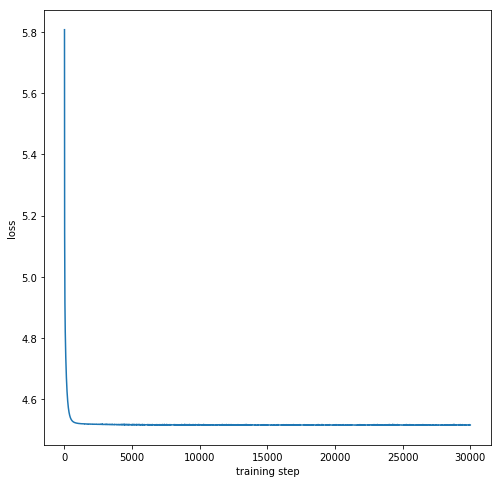

91.4631576538086

In [9]:
nnet_model.fit(spx_rkth2[:3000], draw_loss=True,steps=30000, lrs=[1e-3])

In [10]:
roughvol_model.fit(spx_rkth2[:3000])

0.14648771963095852

In [11]:
nnet_model.predict(spx_rkth2[3000:4000])

array([[0.00631387, 0.00578854, 0.00549044, ..., 0.00689951, 0.00652272,
        0.00633259],
       [0.00536663, 0.00512437, 0.00483128, ..., 0.00652546, 0.00637851,
        0.00564936],
       [0.00499475, 0.00466533, 0.00535818, ..., 0.00650369, 0.00553963,
        0.00641848],
       ...,
       [0.00574583, 0.00608136, 0.00507444, ..., 0.00634196, 0.00621346,
        0.00683889],
       [0.00706024, 0.00580979, 0.0056346 , ..., 0.006515  , 0.00717839,
        0.00708609],
       [0.00644034, 0.00621971, 0.00693902, ..., 0.00720561, 0.00720893,
        0.00706423]])

In [12]:
result=[]
for i in tqdm(range(100)):
    forward = i+1
    roughvol_model.forward = forward
    result.append(roughvol_model.predict(spx_rkth2[3000:4000]))
roughvol_result = np.array(result).T

In [13]:
nnet_result=nnet_model.predict(spx_rkth2[3000:4000])

In [14]:
spx_rkth2[3200:4000]

array([0.0053282 , 0.00513356, 0.00485005, 0.00566834, 0.00560973,
       0.00632064, 0.00565387, 0.00528217, 0.0048007 , 0.00374618,
       0.00573374, 0.00626552, 0.00677534, 0.00958057, 0.00708306,
       0.00813837, 0.00699442, 0.00617632, 0.00495881, 0.00650566,
       0.00526325, 0.00560806, 0.01159031, 0.00825946, 0.00935597,
       0.00413285, 0.0084527 , 0.00812782, 0.00831681, 0.0097478 ,
       0.00775802, 0.00675144, 0.00401554, 0.00425217, 0.00576053,
       0.00655766, 0.00835383, 0.00771574, 0.00540959, 0.00649905,
       0.00614067, 0.00688352, 0.00551706, 0.00599757, 0.0040626 ,
       0.00491123, 0.00579612, 0.00513453, 0.00477475, 0.00494356,
       0.0047361 , 0.00455281, 0.00511961, 0.00842341, 0.00327267,
       0.00473936, 0.00869313, 0.00786656, 0.00978317, 0.01113698,
       0.00507933, 0.00441334, 0.00457665, 0.00455024, 0.00440937,
       0.0052749 , 0.00327821, 0.00363029, 0.00449387, 0.00343324,
       0.00395321, 0.00356648, 0.00336136, 0.002924  , 0.00441

In [15]:
roughvol_result.shape,  nnet_result.shape

((801, 100), (801, 100))

In [16]:
true_result = np.array([spx_rkth2[ele:ele+101] for ele in range(3199,4000)])

In [17]:
true_result.shape

(801, 101)

In [18]:
unconditional_var = np.mean((np.log(true_result[:,1:])-np.log(true_result[:,0][:,np.newaxis]))**2,axis=0)

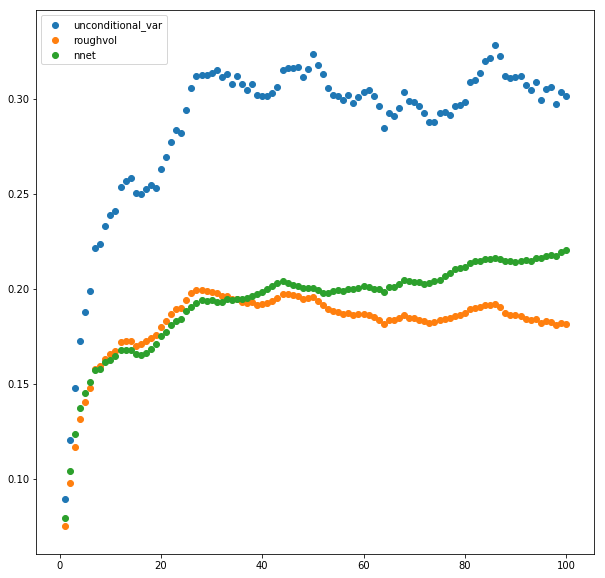

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(np.arange(1,101),unconditional_var)
plt.scatter(np.arange(1,101),np.mean((np.log(true_result[:,1:]) - np.log(roughvol_result))**2,axis=0))
plt.scatter(np.arange(1,101),np.mean((np.log(true_result[:,1:]) - np.log(nnet_result))**2,axis=0))
plt.legend(['unconditional_var', 'roughvol','nnet'])

In [20]:
np.mean((np.log(true_result[:,1:]) - np.log(roughvol_result))**2,axis=0)

array([0.07496728, 0.0979553 , 0.11661759, 0.13141799, 0.14052059,
       0.14764065, 0.15746845, 0.15915918, 0.16316018, 0.16551518,
       0.16737953, 0.17178582, 0.17243225, 0.1726361 , 0.17006023,
       0.17089772, 0.17239242, 0.17409108, 0.17561224, 0.18008877,
       0.18319615, 0.18651926, 0.18921839, 0.18970361, 0.19426814,
       0.19750734, 0.19942067, 0.19944903, 0.19882119, 0.19836241,
       0.19762474, 0.19626184, 0.1962724 , 0.19435842, 0.19460943,
       0.19291879, 0.19236906, 0.19294603, 0.19152323, 0.19182472,
       0.19263362, 0.19362135, 0.19533491, 0.19729188, 0.19713028,
       0.19653794, 0.19600164, 0.19444741, 0.19503163, 0.19573921,
       0.19346226, 0.19138585, 0.1891852 , 0.18802854, 0.18766708,
       0.18673195, 0.18708342, 0.18606166, 0.18652672, 0.18665735,
       0.18592558, 0.18492212, 0.18336958, 0.18143113, 0.18354076,
       0.18353641, 0.18478433, 0.18607909, 0.18473032, 0.18453659,
       0.18363023, 0.18287364, 0.18211085, 0.18250202, 0.18346

In [21]:
np.mean((np.log(true_result[:,1:]) - np.log(nnet_result))**2,axis=0)

array([0.07952704, 0.10405807, 0.12347857, 0.13731844, 0.14527755,
       0.15103556, 0.1569826 , 0.15770912, 0.1615883 , 0.16264131,
       0.1646006 , 0.16767492, 0.16783996, 0.16784816, 0.16547445,
       0.16489175, 0.16623301, 0.16832656, 0.17084264, 0.17511359,
       0.1771458 , 0.1806665 , 0.18316644, 0.18398422, 0.18805525,
       0.19045002, 0.19238051, 0.19384567, 0.19349763, 0.19382116,
       0.19313126, 0.19310783, 0.19475553, 0.19380077, 0.19436589,
       0.1944115 , 0.19492811, 0.196395  , 0.19741416, 0.19832876,
       0.19981738, 0.20155486, 0.20275584, 0.20428548, 0.2031868 ,
       0.20204547, 0.20153962, 0.20033013, 0.20037033, 0.20058273,
       0.19910651, 0.19796161, 0.19755328, 0.19866834, 0.19931708,
       0.1987819 , 0.19995656, 0.20005348, 0.20035993, 0.20148944,
       0.20102207, 0.19985672, 0.19993493, 0.19811104, 0.20080664,
       0.20072776, 0.2024487 , 0.2047321 , 0.20398674, 0.20358857,
       0.20361663, 0.20238532, 0.20298755, 0.20400914, 0.20473